# <p align =center> Sentiment Analysis on Movie Reviews </p>
This project is related to NLP. As you may already know, the most important and hardest part of an NLP project is pre-processing, which is why I am going to focus on that.

---
## 1. Get the data

#### Download the data and process it in order to obtain:

* `X_train:` list with reviews for training.
* `y_train:` list with labels for training.
* `X_test:` list with reviews for testing.
* `y_test:` list with labels for testing.

`Notes:` Use the target column as `positive`, that way the positive value will be indicated with a value of `1` and negative with a value of `0`. In this case, a split train/test is not necessary because the original data is already separated.

In [ ]:
import os
from tqdm.notebook import tqdm
import text_normalizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import pickle
from datetime import datetime,date
import utils
import evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from nltk.tokenize.toktok import ToktokTokenizer
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from nltk.tokenize.toktok import ToktokTokenizer

In [2]:
def walkdir(folder):
    """
    Walk through all the files in a directory and its subfolders.

    Parameters
    ----------
    folder : str
        Path to the folder you want to walk.

    Returns
    -------
        For each file found, yields a tuple having the path to the file
        and the file name.
    """
    for dirpath, _, files in os.walk(folder):
        for filename in files:
            yield (dirpath, filename)

In [3]:
def get_the_data(dataset):
    """
    Explicar la funcion

    Parameters
    ----------
    dataset: str
        Path to the dataset you want to get.

    Returns
    -------
        Four lists with , yields a tuple having the path to the file
        and the file name.
    """

    X_train= []
    y_train= []
    X_test= []
    y_test= []
    
    #walk over dataset path directories
    for dirpath, filename in tqdm(walkdir(dataset)):
        review_path = os.path.join(dirpath, filename)
        datatype = dirpath.split("/")[-2]
        label = dirpath.split("/")[-1]
        if datatype == 'test':
            #read with utf-8 to encode all special characters
            with open (review_path,'r',encoding = 'utf-8') as file:
                review = file.read()
            #target transform 
            if label == 'neg':
                target = 0
            else:
                target = 1
            X_test.append(review)
            y_test.append(target)
        #datatype train has an extra folder to train unsupervised models    
        elif datatype == 'train' and label != 'unsup':
            #read with utf-8 to encode all special characters
            with open (review_path,'r',encoding = 'utf-8') as file:
                review = file.read()
            #target transform
            if label == 'neg':
                target = 0
            else:
                target = 1
            X_train.append(review)
            y_train.append(target)
    
    return X_train,y_train,X_test,y_test

In [4]:
X_train,y_train,X_test,y_test = get_the_data('data/movie_reviews_dataset')

print(f'Dataset Lists:\n'
      f'X_train: {len(X_train):,} reviews\n'
      f'y_train: {len(y_train):,} labels \n'
      f'X_test: {len(X_test):,} reviews\n'
      f'y_test: {len(y_test):,} labels'
     )

0it [00:00, ?it/s]

Dataset Lists:
X_train: 25,000 reviews
y_train: 25,000 labels 
X_test: 25,000 reviews
y_test: 25,000 labels


In [5]:
#dataset checkpoint
utils.save_data_checkpoint(X_train,'data/data_checkpoints/dataset/X_train.pickle')
utils.save_data_checkpoint(y_train,'data/data_checkpoints/dataset/y_train.pickle')
utils.save_data_checkpoint(X_test,'data/data_checkpoints/dataset/X_test.pickle')
utils.save_data_checkpoint(y_test,'data/data_checkpoints/dataset/y_test.pickle')

Object saved successfully in data/data_checkpoints/dataset/X_train.pickle.
Object saved successfully in data/data_checkpoints/dataset/y_train.pickle.
Object saved successfully in data/data_checkpoints/dataset/X_test.pickle.
Object saved successfully in data/data_checkpoints/dataset/y_test.pickle.


### *Don't change anything in this block, just make it run correctly*

Check that if the dimensions match.

In [6]:
def check_data(X_train, y_train, X_test, y_test):
    if len(X_train) == len(y_train) == len(X_test) == len(y_test) == 25000:
        print('Reading Data Success!')
    else:
        raise ValueError('Dimensions do not match!')

check_data(X_train, y_train, X_test, y_test)

Reading Data Success!


---
## 2. Normalize the data

* `remove_html_tags(text):` to remove all HTML tags that may be present in text.
* `remove_accented_chars(text):` to remove accented characters from text
* `expand_contractions(text):` to expand contractions of the type, "don't" to "do not". The contractions are already defined in the "contractions.py" file.
* `lemmatize_text(text):` to lemmatize text.
* `stem_text(text):` to apply stemming (NLTK's PorterStemmer) on text.
* `remove_special_chars(text):` to remove special characters from text.
* `remove_special_chars(text, remove_digits=True):` to remove numbers, note that it is the same function to remove special characters with the addition of an argument that enables or disables the removal of numbers.
* `remove_stopwords(text, stopwords=stop_words):` to remove stopwords from text.
* `remove_extra_new_lines(text):` to remove extra newlines from text.
* `remove_extra_whitespace(text):` to remove extra whitespaces from text.

If you want to add more features that would be great, for example you could start by removing emojis, using different stemming algorithms, etc. The more functions you have the better, remember that the texts are very varied and the preprocessing depends a lot on the source of our data.

To apply each of the functions you created and pre-process the dataset, you must use the `normalize_corpus` function of the `text_normalizer.py` script. In this method each of the functions you wrote is called, in fact you must enable or disable what you consider necessary (`at this point we leave it to your free choice, for example: you can lemmatize or apply stemming or directly not apply any of the two and so on with the rest, but that is your choice`), this function simply groups the previous ones for a more simplified use.

In [7]:
start_time = utils.timer(None)

#vectorization with lemmatization
X_train = text_normalizer.normalize_corpus(X_train,text_lemmatization=True)
X_test = text_normalizer.normalize_corpus(X_test,text_lemmatization=True)

utils.timer(start_time)

/home/app/.local/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Time taken by function: 0 hours , 42 mins and 55 secs


In [8]:
#check lists
print(f'Normalized Lists:\n'
      f'X_train: {len(X_train):,} reviews\n'
      f'y_train: {len(y_train):,} labels \n'
      f'X_test: {len(X_test):,} reviews\n'
      f'y_test: {len(y_test):,} labels'
     )

Normalized Lists:
X_train: 25,000 reviews
y_train: 25,000 labels 
X_test: 25,000 reviews
y_test: 25,000 labels


In [9]:
#data checkpoint normalization with lemmatization
utils.save_data_checkpoint(X_train,'data/data_checkpoints/normalize/X_train_lemm.pickle')
utils.save_data_checkpoint(X_test,'data/data_checkpoints/normalize/X_test_lemm.pickle')

Object saved successfully in data/data_checkpoints/normalize/X_train_lemm.pickle.
Object saved successfully in data/data_checkpoints/normalize/X_test_lemm.pickle.


### *Don't change anything in this block, just make it run correctly*

Test the functions with predefined inputs.

Note that the functions are not defined in the notebook itself, but rather that they are in a python file.

In [10]:
import nltk

# Inputs
doc_html = """
<br /><br />But with plague out there and the news being kept a secret,
the New Orleans PD starts a dragnet of the city's underworld.
"""
doc_accented = "Héllo, thís is an accented sénténce."
doc_contractions = "I can't, because it doesn't work."
doc_lemma = "The striped bats are hanging on their feet for best"
doc_stem = """
Where did he learn to dance like that?
His eyes were dancing with humor.
She shook her head and danced away.
"""
doc_specials = "hello? there A-Z-R_T(,**), world, welcome to python. this **should? the next line#followed- by@ an#other %million^ %%like $this."
doc_digits = "abc123def456ghi789zero0 hello my friend number 10"
doc_stop = "He is a very good person"
doc_new_lines = """we
use
a
lot
of
lines"""
doc_spaces = "Hello           my      dear          friend"

# Outputs
good_html = """
But with plague out there and the news being kept a secret,
the New Orleans PD starts a dragnet of the city's underworld.
"""
good_accented = "Hello, this is an accented sentence."
good_contractions = "I cannot, because it does not work."
good_lemma = "the stripe bat be hang on their foot for good"
good_stem = "where did he learn to danc like that ? hi eye were danc with humor. she shook her head and danc away ."
good_specials = "hello there AZRT world welcome to python this should the next linefollowed by another million like this"
good_digits = "abcdefghizero hello my friend number "
good_stop = "good person"
good_new_lines = "we use a lot of lines"
good_spaces = "Hello my dear friend"
stop_words = nltk.corpus.stopwords.words('english')

def check_normalization():
    if good_html == text_normalizer.remove_html_tags(doc_html):
        print('[1/10] Remove HTML Success!')
    else:
        raise ValueError('[1/10] Remove HTML Fail!')
        
    if good_accented == text_normalizer.remove_accented_chars(doc_accented):
        print('[2/10] Remove Accented Success!')
    else:
        raise ValueError('[2/10] Remove Accented Fail!')
        
    if good_contractions == text_normalizer.expand_contractions(doc_contractions):
        print('[3/10] Expand Contractions Success!')
    else:
        raise ValueError('[3/10] Expand Contractions Fail!')
        
    if good_lemma == text_normalizer.lemmatize_text(doc_lemma):
        print('[4/10] Lemmatization Success!')
    else:
        raise ValueError('[4/10] Lemmatization Fail!')
        
    if good_stem == text_normalizer.stem_text(doc_stem):
        print('[5/10] Stemming Success!')
    else:
        raise ValueError('[5/10] Stemming Fail!')
        
    if good_specials == text_normalizer.remove_special_chars(doc_specials):
        print('[6/10] Remove Specials Success!')
    else:
        raise ValueError('[6/8] Remove Specials Fail!')
        
    if good_digits == text_normalizer.remove_special_chars(doc_digits, remove_digits=True):
        print('[7/10] Remove Digits Success!')
    else:
        raise ValueError('[7/10] Remove Digits Fail!')
        
    if good_stop == text_normalizer.remove_stopwords(doc_stop, stopwords=stop_words):
        print('[8/10] Remove Stopwords Success!')
    else:
        raise ValueError('[8/10] Remove Stopwords Fail!')
    
    if good_new_lines == text_normalizer.remove_extra_new_lines(doc_new_lines):
        print('[9/10] Remove New Lines Success!')
    else:
        raise ValueError('[9/10] Remove New Lines Fail!')
        
    if good_spaces == text_normalizer.remove_extra_whitespace(doc_spaces):
        print('[10/10] Remove Extra Whitespaces Success!')
    else:
        raise ValueError('[10/10] Remove Extra Whitespaces Fail!')

check_normalization()

[1/10] Remove HTML Success!
[2/10] Remove Accented Success!
[3/10] Expand Contractions Success!
[4/10] Lemmatization Success!
[5/10] Stemming Success!
[6/10] Remove Specials Success!
[7/10] Remove Digits Success!
[8/10] Remove Stopwords Success!
[9/10] Remove New Lines Success!
[10/10] Remove Extra Whitespaces Success!


---
## 3. Feature Engineering

You already have the pre-processed data, now you must vectorize them, because remember that the models only understand numbers. At this stage choose whether you want to vectorize with BoW or with TF-IDF. Later we will train our own embedding but for now we go with a more "classic" vectorization.

In [11]:
start_time = utils.timer(None)

#instance object
vectorizer = TfidfVectorizer(ngram_range=(1,2)) #(2,2)(2,3)
#fit transform datasets
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)
#get features
all_words = vectorizer.get_feature_names()

utils.timer(start_time)

/home/app/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Time taken by function: 0 hours , 0 mins and 28 secs


In [12]:
#normalized lists vectorization check
print(f'Total features: {len(all_words):,}\n'
      f'X_train vectors shape: {vectors_train.shape}\n'
      f'X_test vectors shape: {vectors_test.shape}')

Total features: 1,632,436
X_train vectors shape: (25000, 1632436)
X_test vectors shape: (25000, 1632436)


In [13]:
#data save checkpoint
utils.save_data_checkpoint(vectors_train,'data/data_checkpoints/vectorize/vectors_train_lemm.pickle')
utils.save_data_checkpoint(vectors_test,'data/data_checkpoints/vectorize/vectors_test_lemm.pickle')

Object saved successfully in data/data_checkpoints/vectorize/vectors_train_lemm.pickle.
Object saved successfully in data/data_checkpoints/vectorize/vectors_test_lemm.pickle.


## 4. Modeling and Performance Evaluation

In [14]:
#Random Forest Classifier with Randomized Search CV

rf = RandomForestClassifier(n_estimators=1, random_state=42)

params = {
 'bootstrap': [True, False],
 'max_depth': [300,400,500],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1,2,3],
 'min_samples_split': [8,10,11],
 'n_estimators': [300,350,400]
}

start_time = utils.timer(None)

rforest_randomcv = RandomizedSearchCV(rf, params, n_iter=5, random_state=42, cv=5,scoring='roc_auc',verbose=5)
rforest_randomcv.fit(vectors_train,y_train)

utils.timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.933 total time= 6.8min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.935 total time= 7.0min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.937 total time= 6.8min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.927 total time= 6.8min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=300;, score=0.931 total time= 6.9min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.928 total time=25.8min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.930 total time=24.8min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.931 total time=25.0min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.921 total time=24.9min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END bootstrap=True, max_depth=500, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.928 total time=25.2min
[CV 1/5] END bootstrap=True, max_depth=500, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=400;, score=0.929 total time=34.3min
[CV 2/5] END bootstrap=True, max_depth=500, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=400;, score=0.931 total time=33.6min
[CV 3/5] END bootstrap=True, max_depth=500, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=400;, score=0.932 total time=33.4min
[CV 4/5] END bootstrap=True, max_depth=500, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=400;, score=0.922 total time=33.0min
[CV 5/5] END bootstrap=True, max_depth=500, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=400;, score=0.930 total time=33.4min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END bootstrap=True, max_depth=300, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.932 total time= 9.0min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END bootstrap=True, max_depth=300, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.934 total time= 9.3min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END bootstrap=True, max_depth=300, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.937 total time= 9.2min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END bootstrap=True, max_depth=300, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.927 total time= 9.1min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END bootstrap=True, max_depth=300, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.932 total time= 9.2min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END bootstrap=False, max_depth=300, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.933 total time=11.5min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END bootstrap=False, max_depth=300, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.937 total time=11.8min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END bootstrap=False, max_depth=300, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.935 total time=11.4min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END bootstrap=False, max_depth=300, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.929 total time=13.1min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END bootstrap=False, max_depth=300, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.935 total time=12.1min


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Time taken by function: 7 hours , 16 mins and 33 secs


In [15]:
print(f'RandomForestClassifier:\n\nBest params:')
for key, values in rforest_randomcv.best_params_.items():
  print(f'{key} : {values}')
print(f"\nBest Score: {rforest_randomcv.best_score_:.6f}\n")

RandomForestClassifier:

Best params:
n_estimators : 300
min_samples_split : 8
min_samples_leaf : 3
max_features : auto
max_depth : 300
bootstrap : False

Best Score: 0.933802



Model Performance metrics:
------------------------------
Accuracy: 0.97508
Precision: 0.9722465208747515
Recall: 0.97808
F1 Score: 0.9751545363908276

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.97      0.98      0.98     12500
           0       0.98      0.97      0.98     12500

    accuracy                           0.98     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.98      0.98      0.98     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  12226    274
1    349  12151


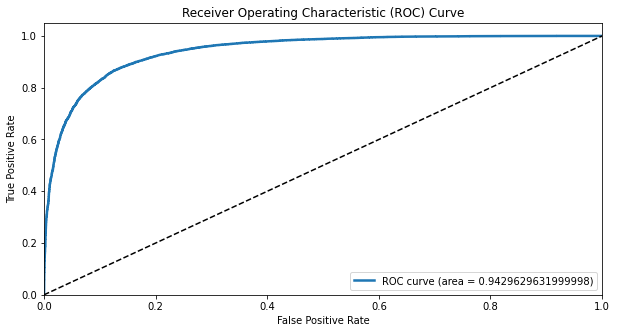

RandomForestClassifier ROC AUC = 0.942963



In [16]:
y_pred = rforest_randomcv.predict(vectors_train)
accuracy, precision, recall, f1_score = evaluation.get_performance(y_pred,y_test)
roc_auc = evaluation.plot_roc(rforest_randomcv,y_test,vectors_test)
print(f"RandomForestClassifier ROC AUC = {roc_auc:.6f}\n")

### *Don't change anything in this block, just make it run correctly*

Let's check that the `get_performance` function returns the metrics correctly. For that we are going to simulate input/output data of a model.

In [17]:
def check_basic_metrics():
    accuracy, precision, recall, f1_score = evaluation.get_performance(
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0], 
        [1, 1, 1, 0, 0, 1, 1, 0, 0, 0]
    )
    
    if (accuracy, precision, recall, f1_score) == (0.6, 0.6, 0.6, 0.6):
        print('Success!')
    else:
        raise ValueError('You must check your get_performance function!')
        
check_basic_metrics()

Model Performance metrics:
------------------------------
Accuracy: 0.6
Precision: 0.6
Recall: 0.6
F1 Score: 0.6

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.60      0.60      0.60         5
           0       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10


Prediction Confusion Matrix:
------------------------------
   0  1
0  3  2
1  2  3
Success!


Let's see if your model at least exceeds an ROC-AUC of 0.90

In [18]:
#change score to 0.90 because of ML Developer support meeting
def check_roc(roc_auc):
    if roc_auc > 0.90:
        print('Success!')
    else:
        raise ValueError('Your model is not good enough!')
        
check_roc(roc_auc)

Success!


---
## 5. Feature Engineering with Custom Word Embedding

### Tokenize reviews and train your own Word Embedding

You are going to have to train your own word embedding, for this we are going to use the __gensim__ library. The only requirement we ask of you is that the $vector\_size=100$.

[Here](https://radimrehurek.com/gensim/models/word2vec.html) you can read Gensim's Word2Vec documentation so you can train your own embedding, using the review data as a corpus.

As a previous step to training your word embedding you must tokenize the corpus, this may take a bit depending on the size of the dataset and the tokenizer we use, if you want you can try the NLTK tokenizer called `ToktokTokenizer`, which turns out to be a little faster (we hope that this recommendation does not bias your work, try and use the ones you want)

In [19]:
X_train = utils.load_data_checkpoint('data/data_checkpoints/normalize/X_train_lemm.pickle')
X_test = utils.load_data_checkpoint('data/data_checkpoints/normalize/X_test_lemm.pickle')

Object loaded successfully from data/data_checkpoints/normalize/X_train_lemm.pickle.
Object loaded successfully from data/data_checkpoints/normalize/X_test_lemm.pickle.


In [20]:
print(f'Normalized lists check:\n'
      f'X_train: {len(X_train):,} reviews\n'
      f'X_test: {len(X_test):,} reviews'
     )

Normalized lists check:
X_train: 25,000 reviews
X_test: 25,000 reviews


In [21]:
#instance tokenizer
tokenizer = ToktokTokenizer()

start_time = utils.timer(None)

X_train_tokens = []
for word in tqdm(X_train):
    X_train_tokens.append(tokenizer.tokenize(word))

X_test_tokens = []
for word in tqdm(X_test):
    X_test_tokens.append(tokenizer.tokenize(word))
    
utils.timer(start_time)

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

Time taken by function: 0 hours , 0 mins and 19 secs


In [22]:
print(f'Vectorized lists check:\n'
      f'X_train_tokens: {len(X_train_tokens):,} reviews\n'
      f'X_test_tokens: {len(X_test_tokens):,} reviews'
     )

Vectorized lists check:
X_train_tokens: 25,000 reviews
X_test_tokens: 25,000 reviews


In [23]:
start_time = utils.timer(None)

model_w2v = Word2Vec(sentences=X_train_tokens, vector_size=100, window=8, min_count=7, workers=4,sg=0,epochs = 100)

utils.timer(start_time)

Time taken by function: 0 hours , 5 mins and 57 secs


### Generate averaged word vector features

Once the embedding has been trained, we must use it. Remember that embedding will convert each word you pass to it into a vector of a given dimension (in our case $vector\_size=100$). So in order to obtain a vector for each review, you must average the vectors of all the words that are part of the same review.

The function must have the following form:
* `vectorizer(corpus, model, num_features=100)`


Where:
* `corpus:` corresponds to the entire dataset, in this way we obtain an average vector for each review, with a single call to the function.
* `model:` is your trained model.
* `num_features:` the dimension of the output vector of your embedding (remember that in our case we set this value to 100).

In [24]:
def vectorizer(corpus, model, num_features=100):
    """
    Vectorize with given input and model.

    Parameters
    ----------
    corpus : list
        List with sentences as elements.
    
    model : Word2Vec
        Trained model from gensim library.

    Returns
    -------
        For every sentence create a vector of 100 features as elements of a list.
    """
    #list of average of w2v model words 
    corpus_vectors=[]
    
    for review in tqdm(corpus):
        #list of w2v model words with 100 features 
        words = []
        for word in review:
            if word in model.wv.key_to_index:
                word = model.wv[word]
                words.append(word)
        words_average = np.add.reduce(words)/len(words)
        corpus_vectors.append(words_average)
    
    return corpus_vectors

In [25]:
start_time = utils.timer(None)

vector_train=vectorizer(X_train_tokens,model_w2v)
vector_test=vectorizer(X_test_tokens,model_w2v)

utils.timer(start_time)

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

Time taken by function: 0 hours , 0 mins and 23 secs


In [34]:
#data checkpoint
utils.save_data_checkpoint(vector_train,'data/data_checkpoints/vectorize/X_train_lemm_w2v.pickle')
utils.save_data_checkpoint(vector_test,'data/data_checkpoints/vectorize/X_test_lemm_w2v.pickle')

Object saved successfully in data/data_checkpoints/vectorize/X_train_lemm_w2v.pickle.
Object saved successfully in data/data_checkpoints/vectorize/X_test_lemm_w2v.pickle.


In [35]:
print(f'Word2Vec vectorization lists check:\n'
      f'Train vectors shape: {len(vector_train):,} reviews\n'
      f'Test vectors shape: {len(vector_test):,} reviews')

Word2Vec vectorization lists check:
Train vectors shape: 25,000 reviews
Test vectors shape: 25,000 reviews


### *Don't change anything in this block, just make it run correctly*

Let's do a simple check of the embedding that you just trained.

In [36]:
def check_embedding(model):
    vector = model.wv['computer']
    if len(vector) == 100:
        print(
            'Success! Your embedding tells me that "women" and "man" '
            f'are similar with a score of {model.wv.similarity("woman", "man")}'
        )
    else:
        raise ValueError('You should check your embedding vector size!')
        
check_embedding(model_w2v)

Success! Your embedding tells me that "women" and "man" are similar with a score of 0.6610027551651001


Now, we are going to check the vectorizer, remember that the vectorizer must generate an average vector of all the words present in the same review. So we're going to get two vectors of two words and manually average them, then using those two words we'll simulate a tokenized sentence and see that it matches the manual way.

In [37]:
def check_vectorizer(model):
    vector1 = model.wv['personal']
    vector2 = model.wv['computer']
    avg = vectorizer([['personal', 'computer']], model)[0]

    if np.allclose((vector1 + vector2) / 2, avg):
        print('Success!')
    else:
        raise ValueError('You should check your vectorizer!')
        
check_vectorizer(model_w2v)

  0%|          | 0/1 [00:00<?, ?it/s]

Success!


### Modeling

Finally train a new model, it can be the same one you used before and compare the results you got using BoW/TF-IDF and Word2Vec.

In addition to training the model we ask you to show:

* `Accuracy`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`
* `ROC Curve`
* `Obtain the ROC-AUC value (later we will do a small minimum performance check with this value)`

In [38]:
y_train = utils.load_data_checkpoint('data/data_checkpoints/dataset/y_train.pickle')
y_test = utils.load_data_checkpoint('data/data_checkpoints/dataset/y_test.pickle')

Object loaded successfully from data/data_checkpoints/dataset/y_train.pickle.
Object loaded successfully from data/data_checkpoints/dataset/y_test.pickle.


/home/app/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model Performance metrics:
------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12500
           0       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  12500      0
1      0  12500


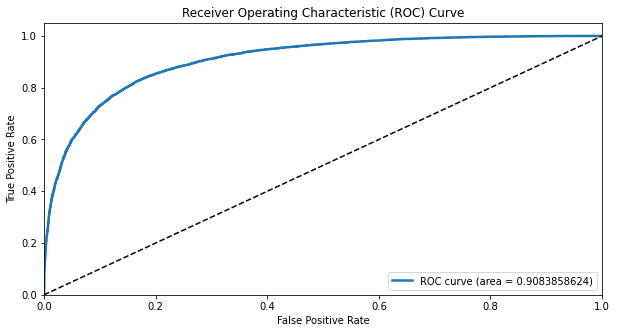

RandomForestClassifier ROC AUC = 0.908386

Time taken by function: 0 hours , 2 mins and 40 secs


In [39]:
#train same RandomForestClassifier with best params
start_time = utils.timer(None)

rf = RandomForestClassifier(
    n_estimators=300, 
    min_samples_split=8,
    min_samples_leaf=3,
    max_features='auto',
    max_depth= 300,
    bootstrap= False,
    random_state=42
)

#train the model
rf.fit(vector_train,y_train)

#predict results
y_pred = rf.predict(vector_train)

#results evaluation
accuracy, precision, recall, f1_score = evaluation.get_performance(y_pred,y_test)
roc_auc = evaluation.plot_roc(rf,y_test,vector_test)
print(f"RandomForestClassifier ROC AUC = {roc_auc:.6f}\n")

utils.timer(start_time)

### *Don't change anything in this block, just make it run correctly*

In [32]:
check_roc(roc_auc)

Success!
